# Анализ бизнес-показателей

## Описание проекта

### Цель исследования 

 - разобраться в причинах убытков развлекательного приложения Procrastinate Pro+, несмотря  на огромные вложения в рекламу, и помочь компании выйти в плюс.
 
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

* лог сервера с данными об их посещениях,

* выгрузка их покупок за этот период,

* рекламные расходы.

Нужно изучить:

* откуда приходят пользователи и какими устройствами они пользуются,

* сколько стоит привлечение пользователей из различных рекламных каналов;

* сколько денег приносит каждый клиент,

* когда расходы на привлечение клиента окупаются,

* какие факторы мешают привлечению клиентов.

# Описание данных

* visits_info_short.csv - лог сервера с информацией о посещениях сайта, 

User Id — уникальный идентификатор пользователя

Region — страна пользователя,

Device — тип устройства пользователя,

Channel — идентификатор источника перехода,

Session Start — дата и время начала сессии,

Session End — дата и время окончания сессии.


* orders_info_short.csv — информация о заказах

User Id — уникальный идентификатор пользователя,

Event Dt — дата и время покупки,

Revenue — сумма заказа.

* costs_info_short.csv — информация о расходах на рекламу


dt — дата проведения рекламной кампании,

Channel — идентификатор рекламного источника,

costs — расходы на эту кампанию.


**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. 
- заказы: `/datasets/orders_info_short.csv`. 
- расходы: `/datasets/costs_info_short.csv`. 

# Загрузка файлов и обзор данных <a id='p1'></a>


In [1]:
# загрузка библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
# загрузка датасетов

try:
    sessions = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv', sep=',')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv', sep=',')
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv', sep=',')
except:
    sessions = pd.read_csv('visits_info_short.csv', sep=',')
    orders = pd.read_csv('orders_info_short.csv', sep=',')
    costs = pd.read_csv('costs_info_short.csv', sep=',')

In [3]:
sessions.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
# рассмотрим общую информацию

sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


* нарушен регистр 
* нарушен тип данных
* пропусков нет

In [5]:
orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


* нарушен регистр 
* нарушен тип данных
* пропусков нет

In [7]:
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [8]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


* нарушен регистр 
* нарушен тип данных
* пропусков нет

# Предобработка данных

In [9]:
# исправим регистр 
sessions.columns = [x.lower().replace(' ', '_') for x in sessions.columns.values]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]

In [10]:
# исправим тип данных
sessions['session_start'] = pd.to_datetime(sessions['session_start'])
sessions['session_end'] = pd.to_datetime(sessions['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [11]:
# проверим

sessions.info(), orders.info(), costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

(None, None, None)

**Поиск явных дубликатов**

In [12]:
sessions.duplicated().sum(), orders.duplicated().sum(), costs.duplicated().sum()

(0, 0, 0)

явных дубликатов нет

**Поиск неявных дубликатов**

In [13]:
# изучим уникальные значения sessions
display(sessions['region'].unique(),sessions['device'].unique(),sessions['channel'].unique())


array(['United States', 'UK', 'France', 'Germany'], dtype=object)

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [14]:
# проверка на пропуски

sessions.isna().sum(), orders.isna().sum(), costs.isna().sum()

(user_id          0
 region           0
 device           0
 channel          0
 session_start    0
 session_end      0
 dtype: int64,
 user_id     0
 event_dt    0
 revenue     0
 dtype: int64,
 dt         0
 channel    0
 costs      0
 dtype: int64)

* дубликатов нет

* пропусков нет

* регистр в порядке

* формат данных в порядке

***данные готовы к анализу*** 

## Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Функция для расчёта LTV и ROI


In [15]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функция для расчета конверсии

In [16]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция для расчета удержания

In [17]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

# Исследовательский анализ данных

In [18]:
#создаем профили пользователей

def get_profiles(sessions, orders, costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
 

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


profiles = get_profiles(sessions, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,False,0.230769


In [19]:
profiles = get_profiles(sessions, orders, costs)

In [20]:
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max() 

In [21]:
min_analysis_date

datetime.date(2019, 5, 1)

In [22]:
observation_date 

datetime.date(2019, 10, 27)

**Изучим долю каждой страны от общего количества пользователей**

In [23]:
# узнаем, сколько всего пользователей

'Всего пользователей:', profiles['user_id'].value_counts().sum()

('Всего пользователей:', 150008)

In [24]:
countries = profiles.groupby('region').agg({'user_id': 'nunique'}).sort_values('user_id', ascending=False)
countries['ratio from users, %'] = round(countries['user_id'] / 150008 * 100, 2)
countries

,user_id,"ratio from users, %"
region,,
United States,100002,66.66
UK,17575,11.72
France,17450,11.63
Germany,14981,9.99


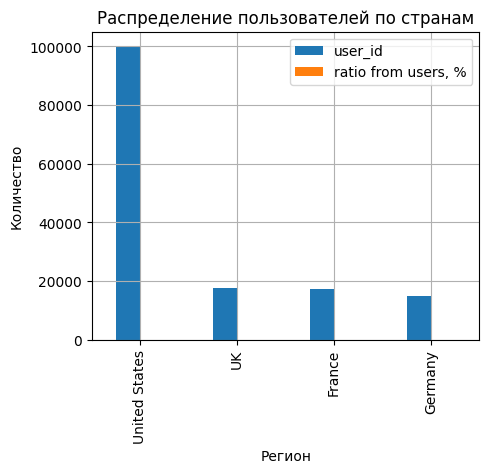

In [25]:
# визуализируем 
countries.plot(kind='bar', grid=True, title='Распределение пользователей по странам', ylabel='Количество', xlabel='Регион', figsize=(5 , 4))
plt.show()

**Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.**

**Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.**


In [26]:
payers = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values('payer', ascending=False)
payers['ratio, %'] = round(payers['payer'] / payers['user_id'] * 100, 2)
payers

,user_id,payer,"ratio, %"
region,,,
United States,100002,6902,6.90
UK,17575,700,3.98
France,17450,663,3.80
Germany,14981,616,4.11


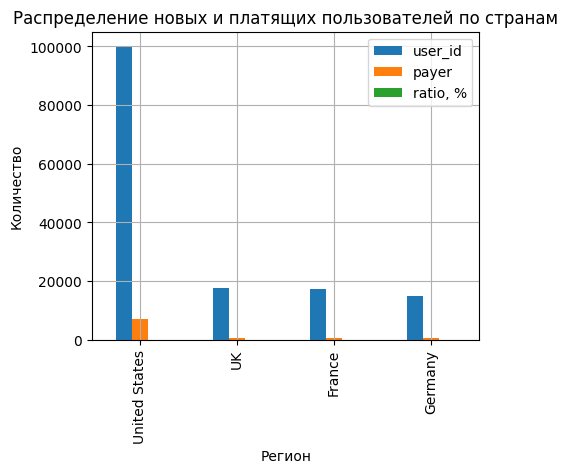

In [27]:
#визуализируем 
payers.plot(kind='bar', grid=True, title='Распределение новых и платящих пользователей по странам', ylabel='Количество', xlabel='Регион', figsize=(5 , 4))
plt.show()


* Подавляющее большинство новых и платящих пользователей - из США. 

* Наименьшее количество новых и платящих пользователей - из Германии.

**Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.**

**Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.**


In [28]:
devices = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values('payer', ascending=False)
devices['ratio, %'] = round(devices['payer'] / devices['user_id'] * 100, 2)
devices


,user_id,payer,"ratio, %"
device,,,
iPhone,54479,3382,6.21
Android,35032,2050,5.85
Mac,30042,1912,6.36
PC,30455,1537,5.05


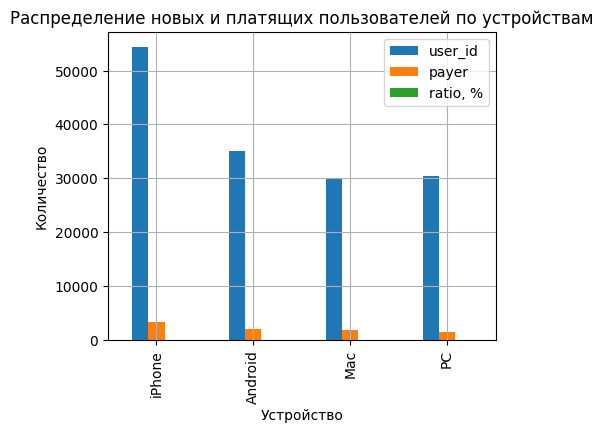

In [29]:
#визуализируем 
devices.plot(kind='bar', grid=True, title='Распределение новых и платящих пользователей по устройствам', ylabel='Количество', xlabel='Устройство', figsize=(5 , 4))
plt.show()

* Большая часть новых и платящих пользовталей использует IPhone. 

Наименьшая - PC.

* Наибольшая доля платящих пользователей - у Mac. 

Наименьшая - у PC.

**Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.** 

**Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.**


In [30]:
ads = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values('user_id', ascending=False)
ads

,user_id,payer
channel,,
organic,56439,1160
FaceBoom,29144,3557
TipTop,19561,1878
OppleCreativeMedia,8605,233
LeapBob,8553,262
WahooNetBanner,8553,453
RocketSuperAds,4448,352
MediaTornado,4364,156
YRabbit,4312,165


* Наибольшее количество новых пользователей пришло в приложение естественным путем (не с помощью рекламы). Наименьшее количество пользователей - канал lambdaMediaAds

In [31]:
# меняем сортировку 

ads2 = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values('payer', ascending=False)
ads2

,user_id,payer
channel,,
FaceBoom,29144,3557
TipTop,19561,1878
organic,56439,1160
WahooNetBanner,8553,453
AdNonSense,3880,440
RocketSuperAds,4448,352
LeapBob,8553,262
OppleCreativeMedia,8605,233
lambdaMediaAds,2149,225


* Наибольшее количество платящих пользователей пришли с канала FaceBoom. Наименьшее - с канала MediaTornado.

In [32]:
# посмотрим на доли платящих пользователей

ads['ratio, %'] = round(ads['payer'] / ads['user_id'] * 100, 2)
ads.sort_values('ratio, %', ascending = False)

,user_id,payer,"ratio, %"
channel,,,
FaceBoom,29144,3557,12.20
AdNonSense,3880,440,11.34
lambdaMediaAds,2149,225,10.47
TipTop,19561,1878,9.60
RocketSuperAds,4448,352,7.91
WahooNetBanner,8553,453,5.30
YRabbit,4312,165,3.83
MediaTornado,4364,156,3.57
LeapBob,8553,262,3.06


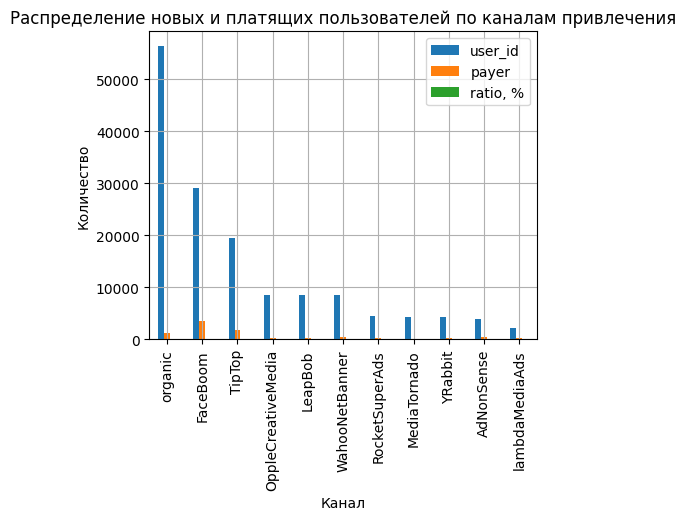

In [33]:
ads.plot(kind='bar', grid=True, title='Распределение новых и платящих пользователей по каналам привлечения', ylabel='Количество', xlabel='Канал', figsize=(5 , 4))
plt.show()

* Наибольшая доля платящих пользователей у пришедших от FaceBoom. 

Наименьшая - у пришедших без рекламы.

### Промежуточный вывод о пользователях и каналах привлечения

Для проведения анализа нами были созданы профили пользователей приложения Procrastinate Pro+. 

В анализе рассматриваются данные на 01.11.2019 года. 

Минимальная дата привлечения - 01.05.2019.

Максимальная дата привлечения - 19.10.2019.


Горизонт анализа - 2 недели (14 дней).

Данные распределены по:

* 4 странам (США, Великобритания, Франция, Германия);

* 4 устройствам (iPhone, Mac, Android, PC);

* 10 каналам привлечения (органика + TipTop, RocketSuperAds, YRabbit, FaceBoom, MediaTornado, AdNonSense, LeapBob, WahooNetBanner, OppleCreativeMedia, lambdaMediaAds).

Большая часть новых пользователей проживает в США (67%), меньшая - в Германии (10%). Примерно одинаковое количество (12%) находятся во Франции и Великобритании.

*Пользователи* 

Наибольшая доля платящих пользователей также принадлежит США (7%). 
С меньшим количеством новых пользователей Германия превосходит остальные страны в количестве платящих пользователей, доля составляет более 4%. Доля Великобритании и Франции приблизительно равны - 3.98% и 3.8% соответственно.

*Устройства* 

Более трети новых пользователей (54.5 тыс) пользуются телефонами iPhone. Среди них и больше всего покупателей - 3382. 

Чуть больше 35 тыс человек используют телефоны на базе Android. Они же идут за пользователями iPhone по числу покупателей - 2050. 

Почти 30.5 тыс человек являются пользователями персональных компьютеров. Из этих пользователей меньше всего новых покупателей - 1537 (в 2 раза меньше, чем пользователей iPhone). 

Чуть более 30 тыс человек пользуются устройствами Mac. 1912 человек стали новыми покупателями. Отмечаем, что несмотря на меньшее количество, на это устройство приходится наибольшая доля покупателей от всего количества пользователей 6.3%. 

6.2% - доля покупателей среди пользователей iPhone, 5.9% - пользователи Android, 5% - пользователи персональных компьютеров. 

*Каналы привлечения* 

Более трети пользователей пришли в приложение самостоятельно, не через рекламные каналы. 

Значительное количество (почти 30 тыс человек) пришли в приложение с помощью канала *Faceboom*, почти 20 тыс - с канала *TipTop*. Следующие каналы привели менее 10 тыс человек. Лидерами можно назвать *OppleCreativeMedia* (8605), *LeapBob* (8553) и *WahooNetBanner* (8553). 

По количеству новых покупателей в топе находятся FaceBoom (3557), TipTop (1878) и органика (1160). Отметим также WahooNetBanner, который идет следом за топом (453). OppleCreativeMedia и LeapBob отстают от топовых каналов. 

Что касается доли покупателей на общее количество пользователей каждого канала, то наибольшую долю имеет опять же Faceboom (12.2%), AdNonSense (11.3%, также имеет высокие показатели в предыдущих категориях), lambdaMediaAds (10.5%, пришло наименьшее количество пользователей). 

Доля органики наименьшая - 2%.

## Маркетинг

Посчитаем общую сумму расходов на маркетинг.

In [34]:
round(costs['costs'].sum(), 1)

105497.3

Сумма расходов составляет 105497.3.

Выясним, как траты распределены по рекламным источникам.

In [35]:
channels_costs = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
channels_costs['sum ratio, %'] = round(channels_costs['costs'] / 105497.3 * 100, 1)
channels_costs['costs'] = round(channels_costs['costs'], 1)
channels_costs

,costs,"sum ratio, %"
channel,,
TipTop,54751.3,51.9
FaceBoom,32445.6,30.8
WahooNetBanner,5151.0,4.9
AdNonSense,3911.2,3.7
OppleCreativeMedia,2151.2,2.0
RocketSuperAds,1833.0,1.7
LeapBob,1797.6,1.7
lambdaMediaAds,1557.6,1.5
MediaTornado,954.5,0.9


Больше всего денег было потрачено на TipTop (54751.3) - 52% и FaceBoom (32445.6) - 31%. 

Доля расходов на остальные каналы менее 5%.



**Визуализируем динамику изменения расходов.**


In [36]:
# создадим сводную таблицу по дате и рекламным источникам

costs_pivot = pd.pivot_table(costs, index = 'dt', columns = 'channel', values = 'costs', aggfunc = sum)
costs_pivot.head()

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
dt,,,,,,,,,,
2019-05-01,40.95,113.3,2.52,6.24,4.25,21.060,80.0,10.8,8.1,17.6
2019-05-02,34.65,78.1,2.94,5.04,4.25,16.965,55.0,7.2,9.9,16.8
2019-05-03,47.25,85.8,2.73,6.96,5.75,16.380,64.0,8.4,9.0,16.8
2019-05-04,51.45,136.4,3.99,9.36,4.25,17.550,70.0,10.8,15.6,17.6
2019-05-05,36.75,122.1,4.62,11.04,5.50,27.495,78.0,12.0,9.6,12.8


In [37]:
# добавим столбец с неделями

costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs.head()

,dt,channel,costs,week
0,2019-05-01,FaceBoom,113.3,18
1,2019-05-02,FaceBoom,78.1,18
2,2019-05-03,FaceBoom,85.8,18
3,2019-05-04,FaceBoom,136.4,18
4,2019-05-05,FaceBoom,122.1,18


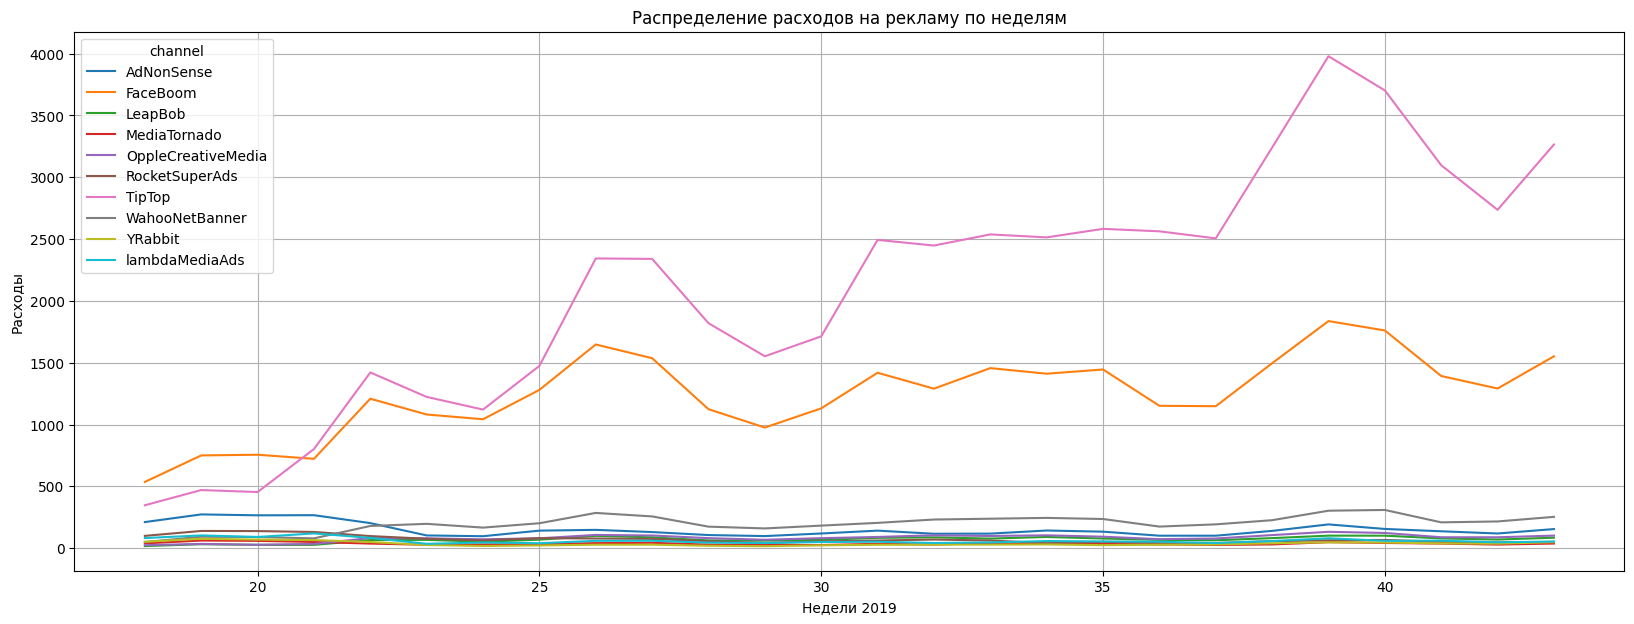

In [38]:
# построим графики расходов по неделям

(costs.pivot_table(index = ['week'], columns = 'channel', values = ['costs'], aggfunc = 'sum')
     .sort_values('week', ascending = True)
     .reset_index()
     .plot(x = 'week', y = 'costs', kind = 'line', grid = True, figsize = (20, 7))
);
plt.title('Распределение расходов на рекламу по неделям')
plt.xlabel('Недели 2019')
plt.ylabel('Расходы')
plt.show()


- в лидерах затрачиваемых средств на начало периода AdNonSense, TipTop, Faceboom, расходы на все источники меньше 500, Faceboom чуть больше 500

- к 25 недели расходы на TipTop стали превышать остальные, достигнув отметки 1500, расходы на AdNonSense уменьшились и уступили место WahooNetBanner

- после 25 недели расходы на рекламу немного возросли и резко упали

- после 30 недели наблюдается рост расходов на рекламу (TipTop, Faceboom, WahooNetBanner)

- до 37 недели расходы на TipTop сохраняются в районе 2500, Faceboom держится около 1500, после 35 недели немного падает

- примерно к 39 неделе расходы на рекламу резко возросли, расходы на TipTop достигли отметки 4000, расходы на Faceboom почти 2000, потом снова начали падать

- в конце периода наблюдается рост расходов на рекламу 

In [39]:
# добавим столбец с месяцами

costs['month'] = pd.to_datetime(costs['dt']).dt.month 
costs.head()

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


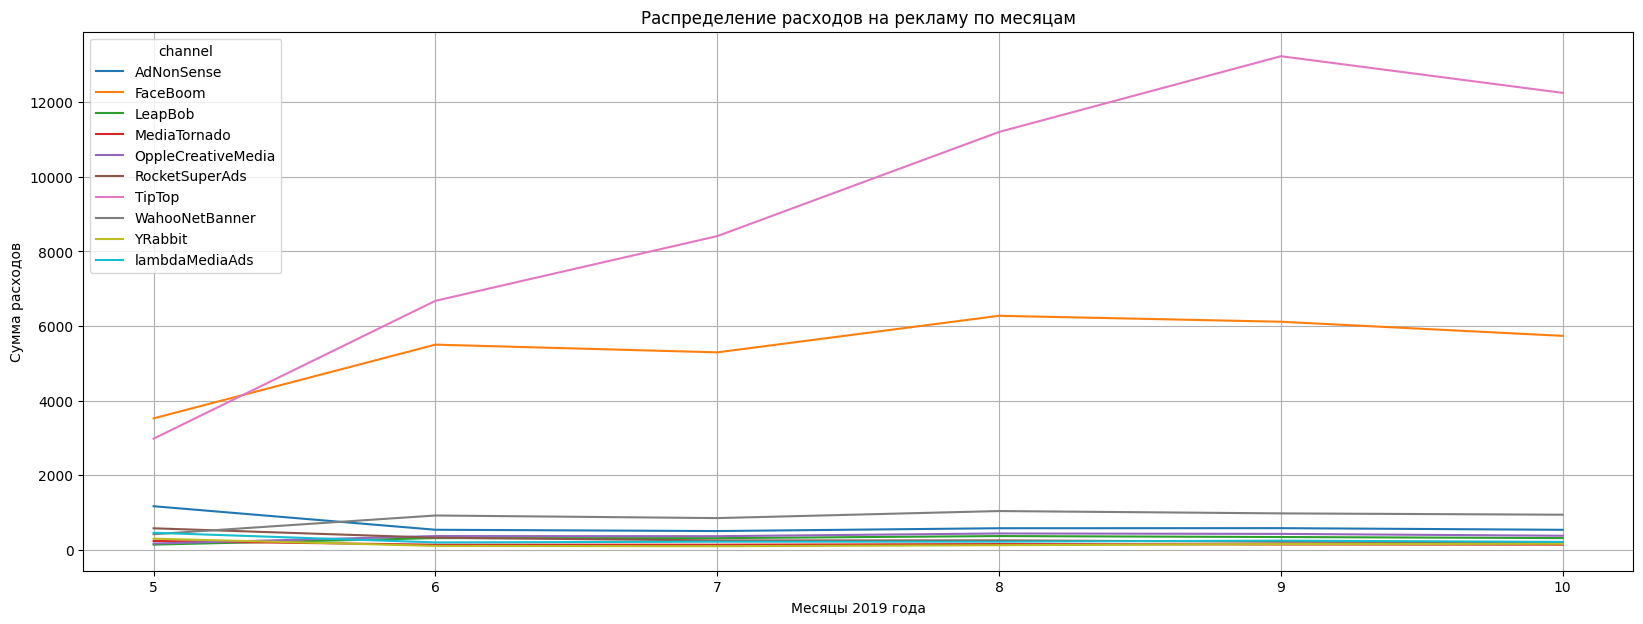

In [40]:
# построим графики расходов на рекламу по месяцам

(costs.pivot_table(index=['month'], columns='channel', values=['costs'], aggfunc='sum')
     .sort_values('month', ascending=True)
     .reset_index()
     .plot(x='month', y='costs', kind='line', grid=True, figsize=(20, 7))
);
plt.title('Распределение расходов на рекламу по месяцам')
plt.xlabel('Месяцы 2019 года')
plt.ylabel('Сумма расходов')
plt.show()

- в лидерах затрачиваемых средств на начало периода AdNonSense, TipTop, Faceboom

- за май рассходы на Faceboom увеличились с почти 4000 до почти 6000, рассходы на TipTop выросли с 3000 до практически 7000, расходы на другие каналы - менее 2000 на протяжении всего периода

- расходы на TipTop стремительно растут на протяжении всего периода, к сентябрю они достигли отметки более 13000

- расходы на Faceboom на протяжении практически всего периода удерживаются в районе отметки 6000

- к октябрю расходы на рекламу незначительно уменьшились

**Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.**


In [41]:
# считаем CAC для каждого источника 
cac = profiles.groupby(['channel']).agg({'acquisition_cost': 'mean'}).sort_values('acquisition_cost', ascending=False)

# отсекаем бесплатных пользователей
cac = cac.query('channel != "organic"')
cac

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [42]:
cac_mean = round(profiles.query('channel != "organic"')['acquisition_cost'].mean(), 2)
cac_mean

1.13

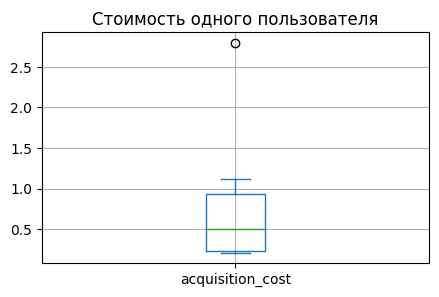

In [43]:
cac.plot.box(title='Стоимость одного пользователя', grid = True, figsize = (5,3))
plt.show()


Стоимость пользователя TipTop намного превышает стоимость других пользователей. Рассчитаем медианное значение.

In [44]:
cac_median = round(profiles.query('channel != "organic"')['acquisition_cost'].median(), 2)
cac_median

1.08

Самый дорогой пользователь у каналов-лидеров по расходам:

- TipTop - 2.8

- FaceBoom - 1.1

- AdNonSense - 1.0
_________________________

- средняя стоимость - 1.13

- средняя стоимость с учетом выбросов - 1.08

### Оценим окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. 

In [45]:
# момент анализа 
observation_date = datetime(2019, 11, 1).date()
observation_date

datetime.date(2019, 11, 1)

In [46]:
# горизонт анализа 
horizon_days = 14

In [47]:
# игнорируем горизонт
ignore_horizon = False

In [48]:
# исключим органических пользователей из таблицы
profiles = profiles.query('channel != "organic"')

In [49]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [50]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

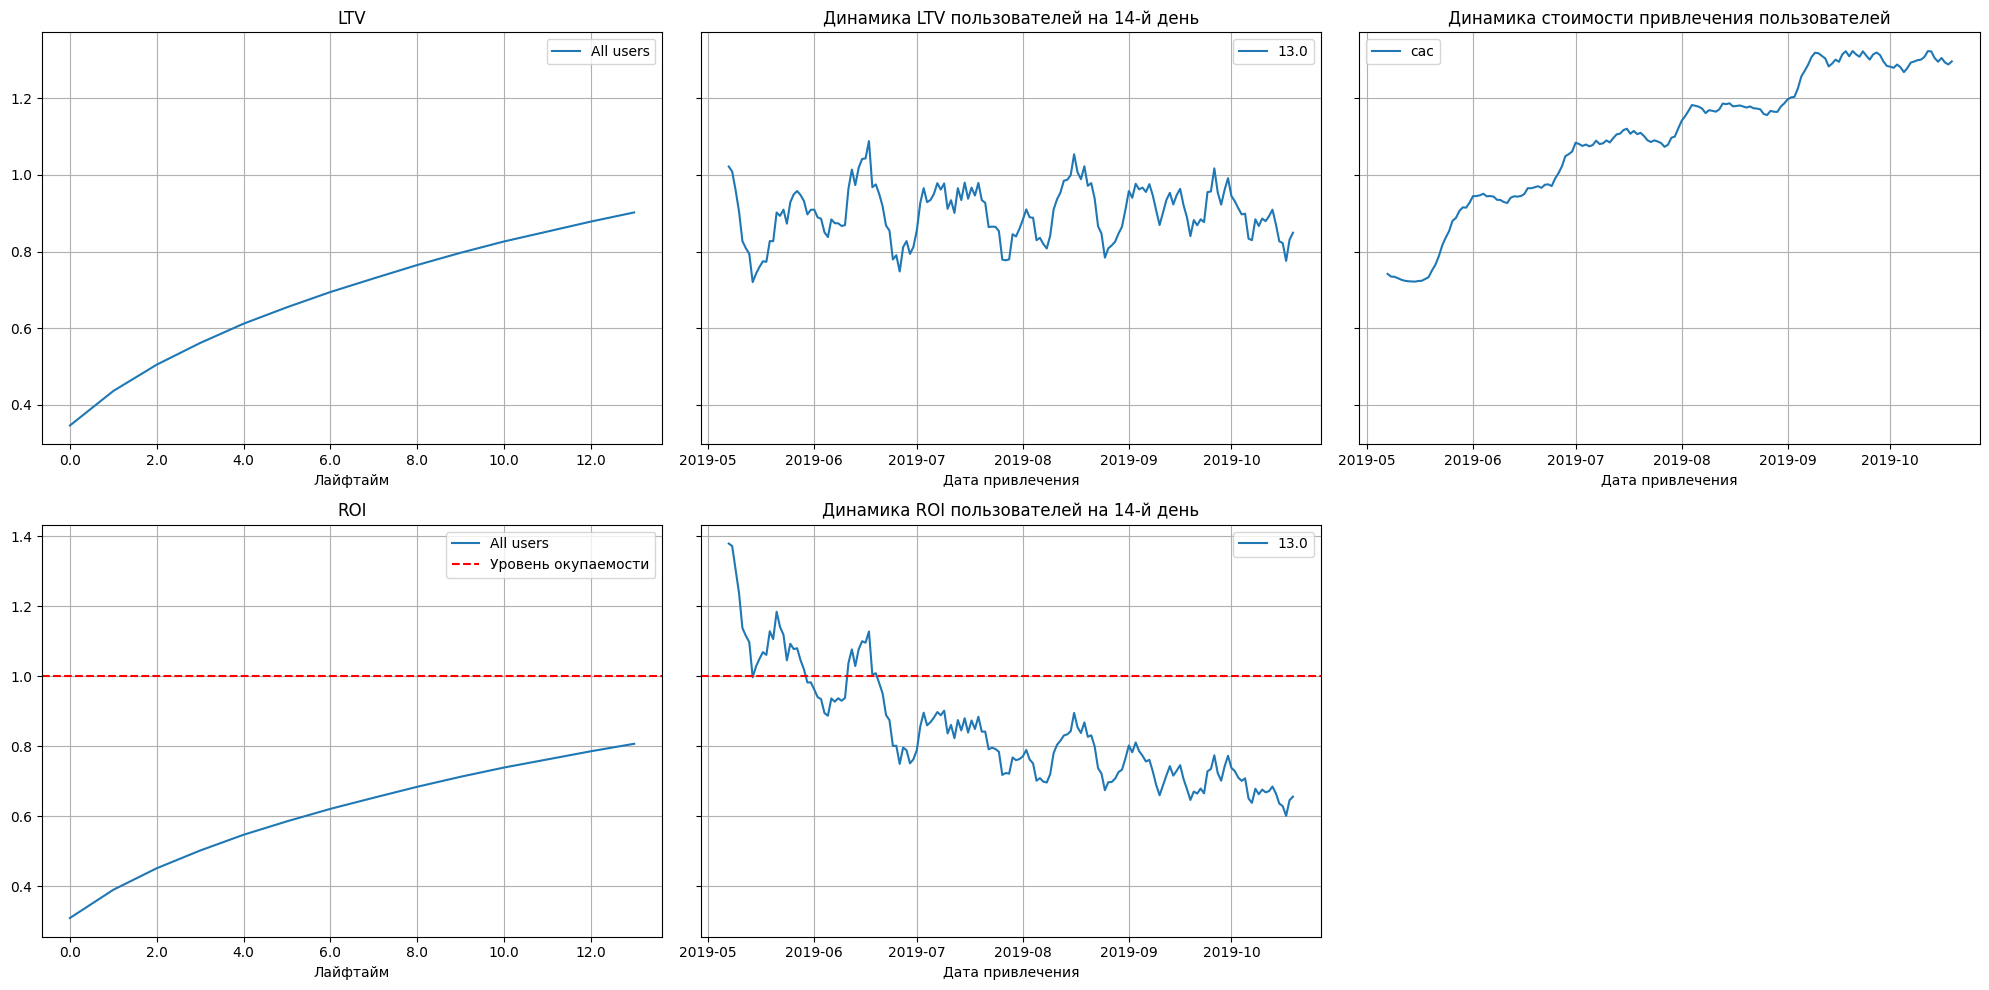

In [51]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- LTV держится примерно на одном уровне 

- CAC растет на протяжении наблюдения

- ROI не достигает уровня окупаемости

=> стоимость пользователей растет, окупаемость падает - кампания убыточна
Пользователи перестают окупаться уже к середине июня

**Изучим окупаемость по странам**

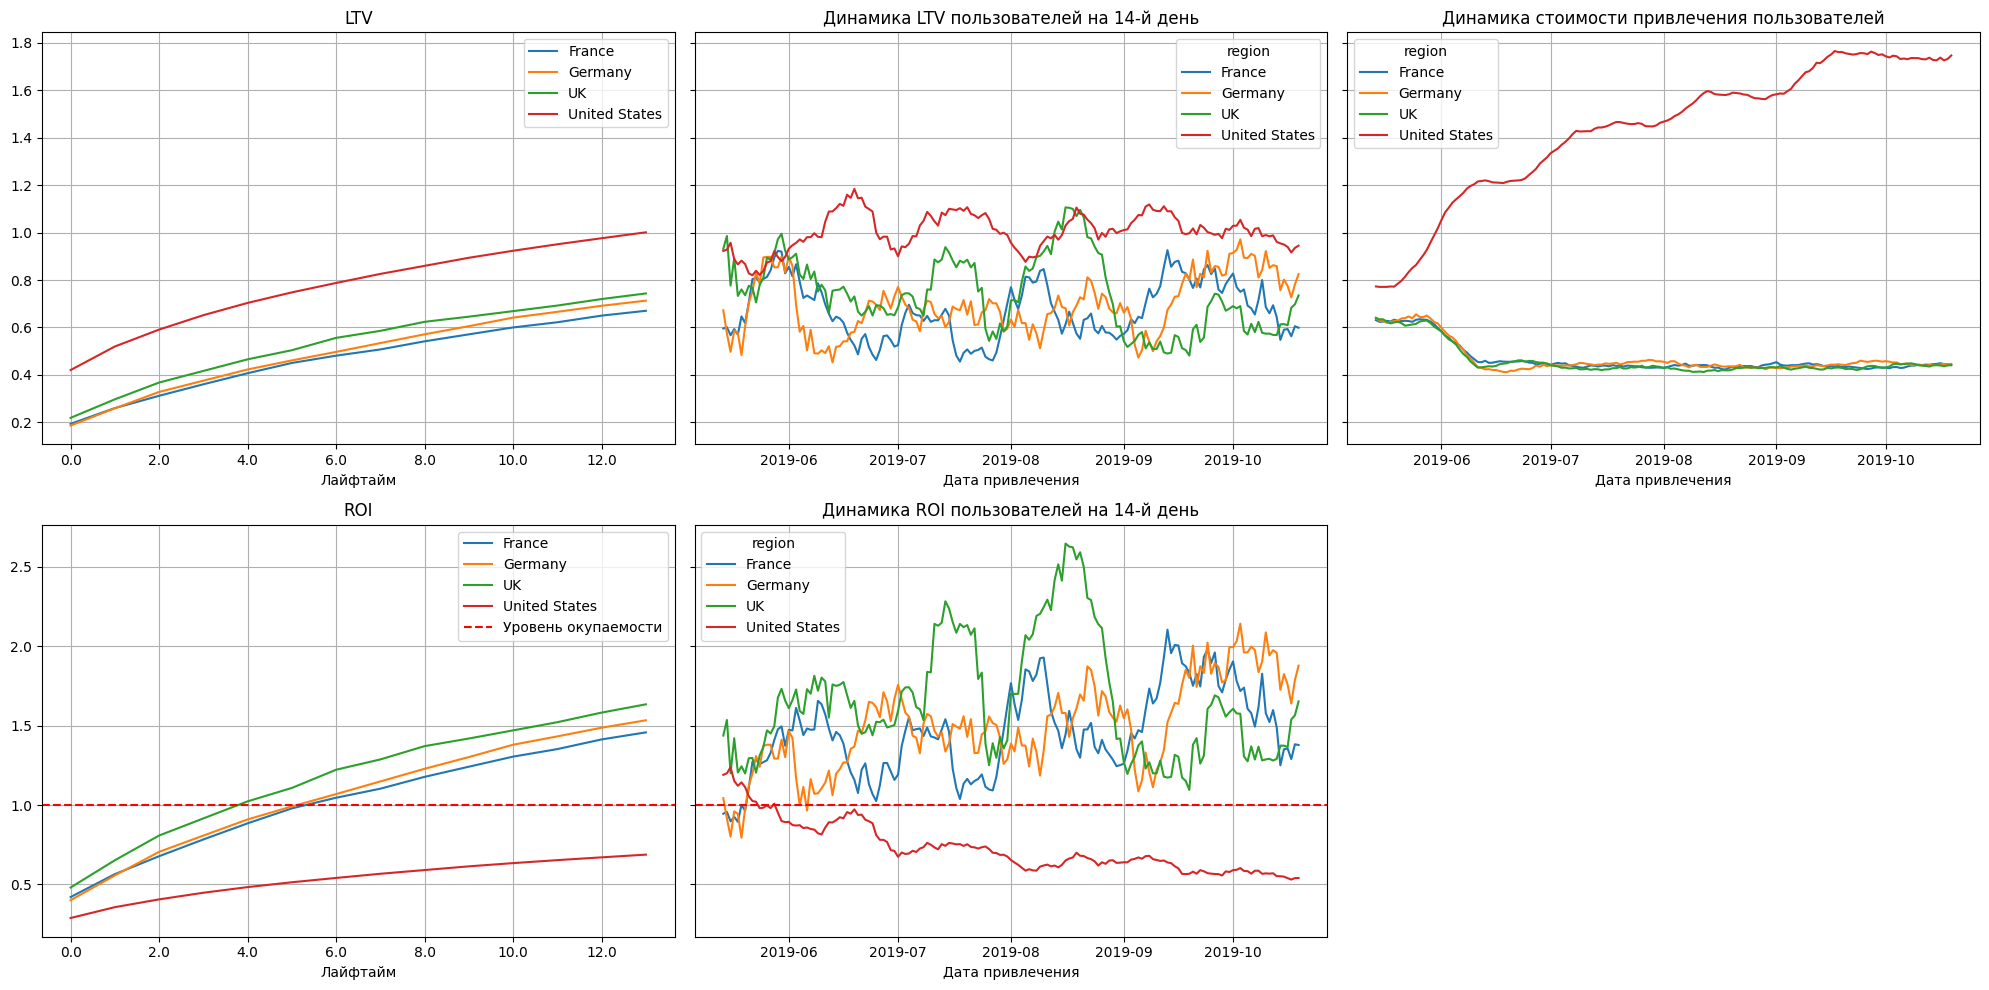

In [52]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Самый высокий LTV у США, однако там самые дорогие пользователи, roi не доходит до уровня окупаемости, причем за чертой окупаемости roi США оказывается практически сразу, хорошую окупаемость показывает Германия - окупается уже к 4-ому дню. 

Важно отметить, что происходит резкий скачок окупаемости в июле, затем в августе и резкое падениев сентябре, на фоне роста окупаемости в других европейских странах - причина либо в сезонности (летний период/пеиод каникул), либо есть другая причина

**Изучим окупаемость по каналам привлечения**

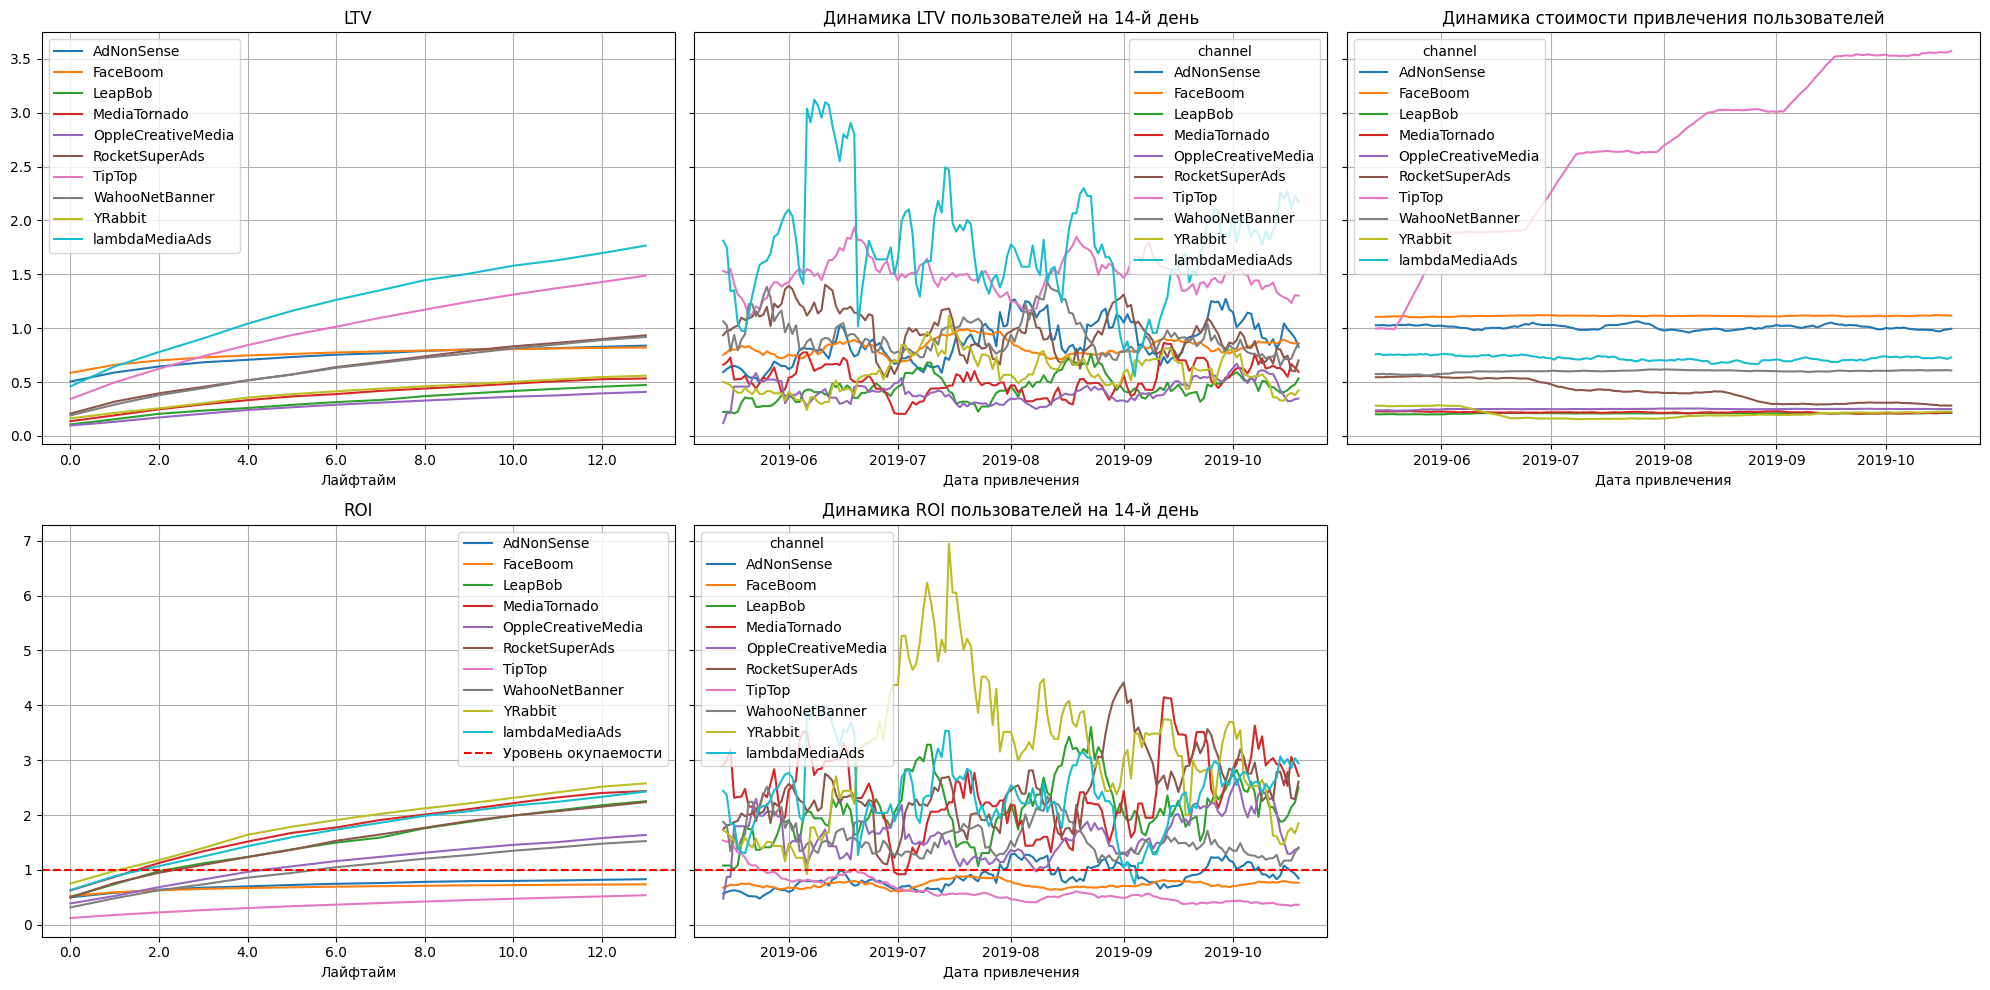

In [53]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- LTV растет, наиболее высокий уровень у каналов lambdaMediaAds, TipTop, 

- динамика стоимости привлечения пользователей растёт только у TipTop

- наиболее дорогостоящие каналы не достигают уровня окупаемости: AdNonSense, FaceBoom, TipTop

- менее дорогостоящие каналы достигают уровня окупаемости на 2 день


**Изучим окупаемость по устройствам**

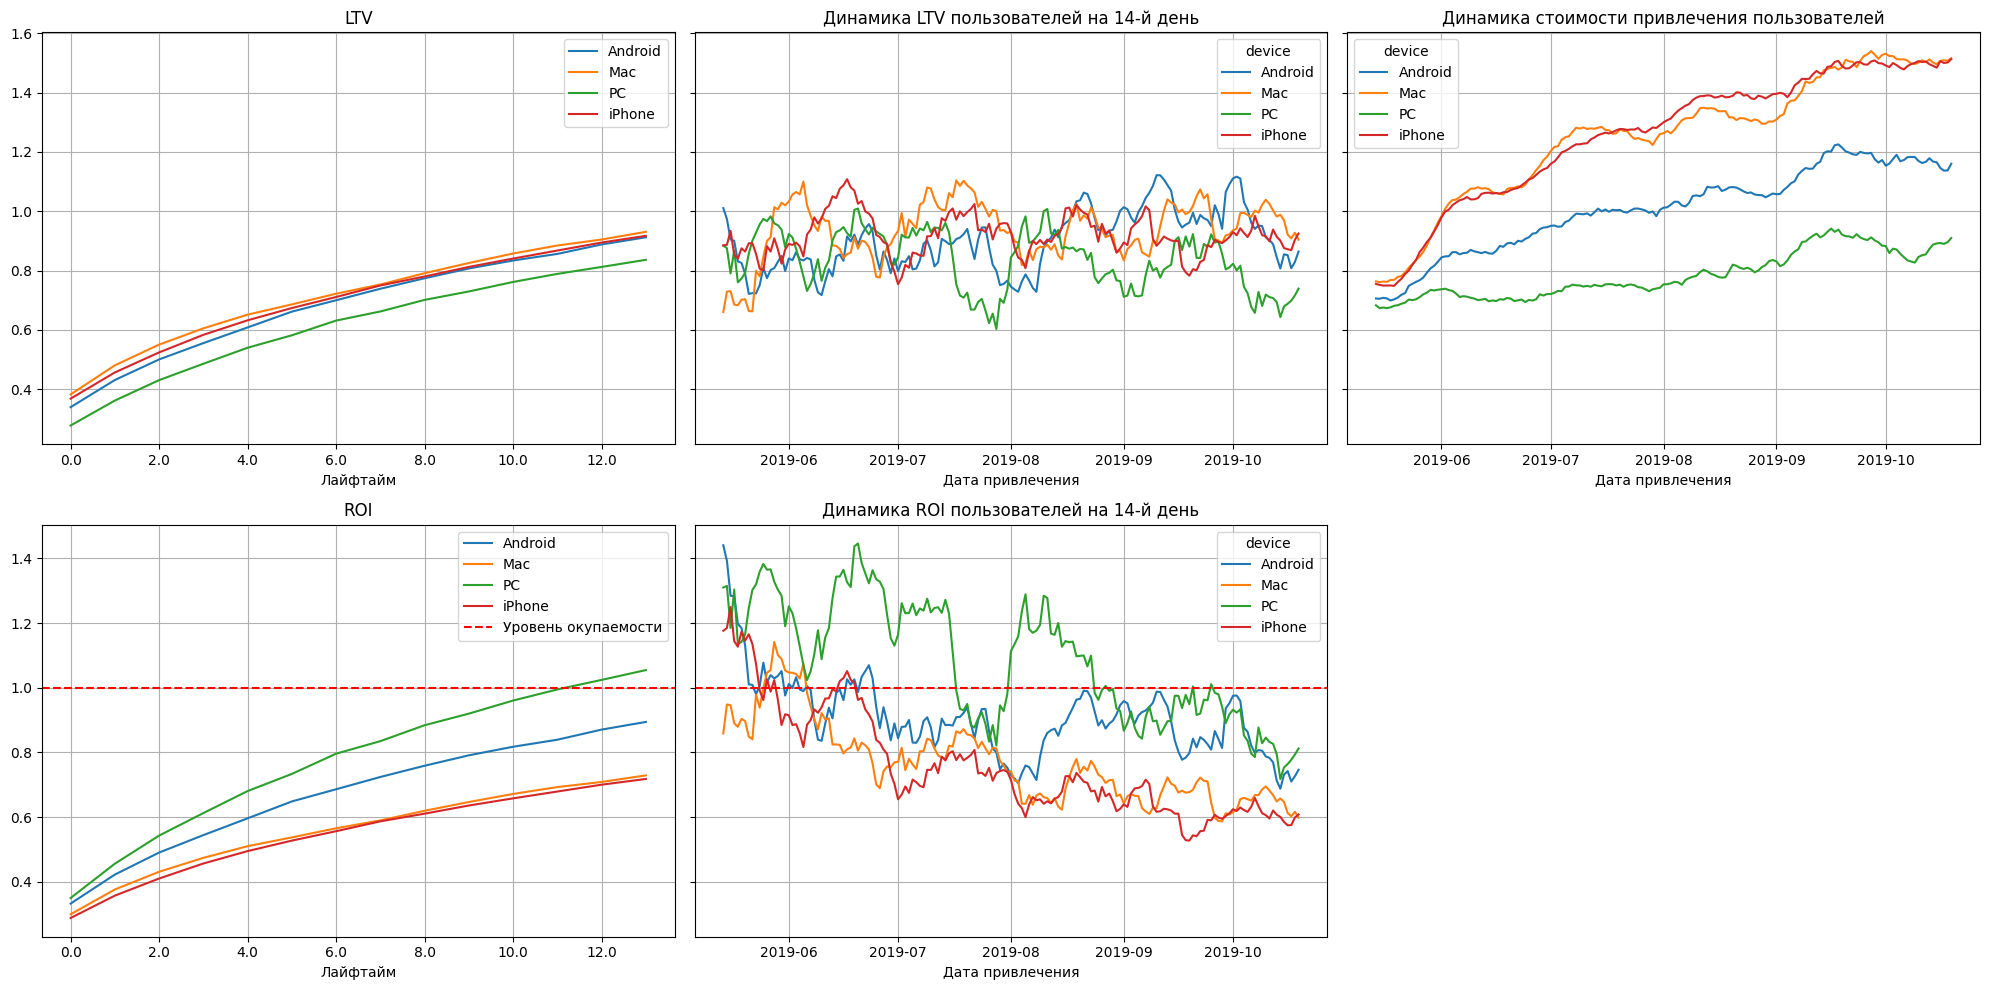

In [54]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- LTV растет у всех девайсов, динамика находится на одном уровне

- больше всего растет стоимость привлечения пользователей iPhone и MAC

- до уровня окупаемости доходят только пользователи PC, пользователи Apple окупаются хуже 

**Изучим конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам**


In [55]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей'.format(horizon))

    plt.tight_layout()
    plt.show() 

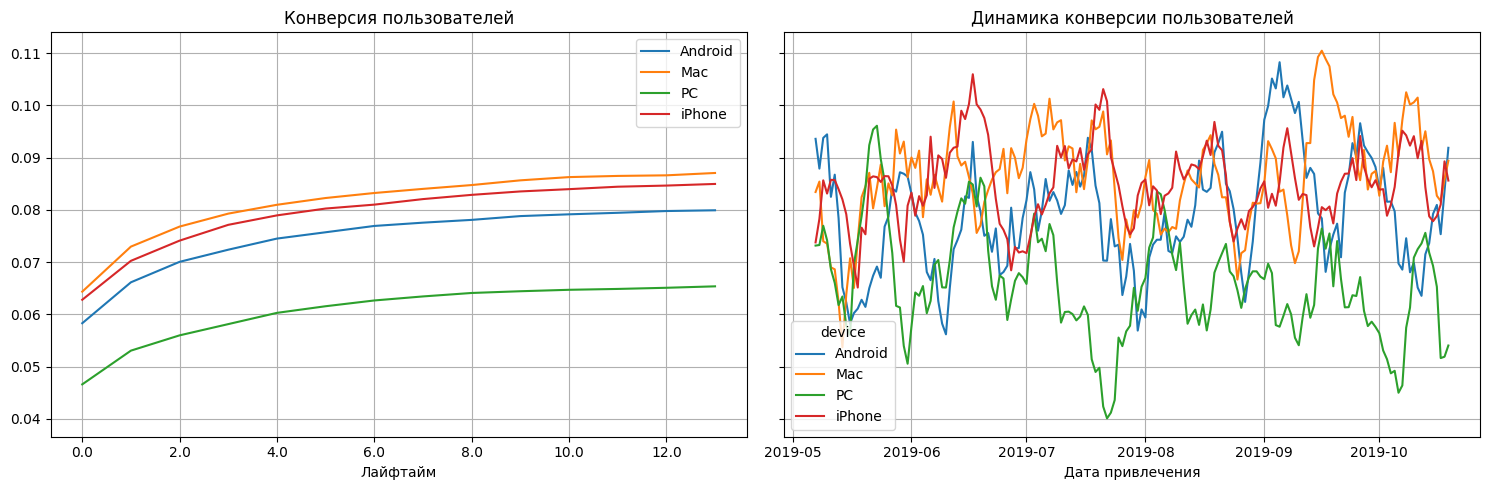

In [56]:
dimensions = ['device']

# конверсия с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

- хуже всего конверсия у PC, по линамике конверсии Android следует за Apple, но падения ниже

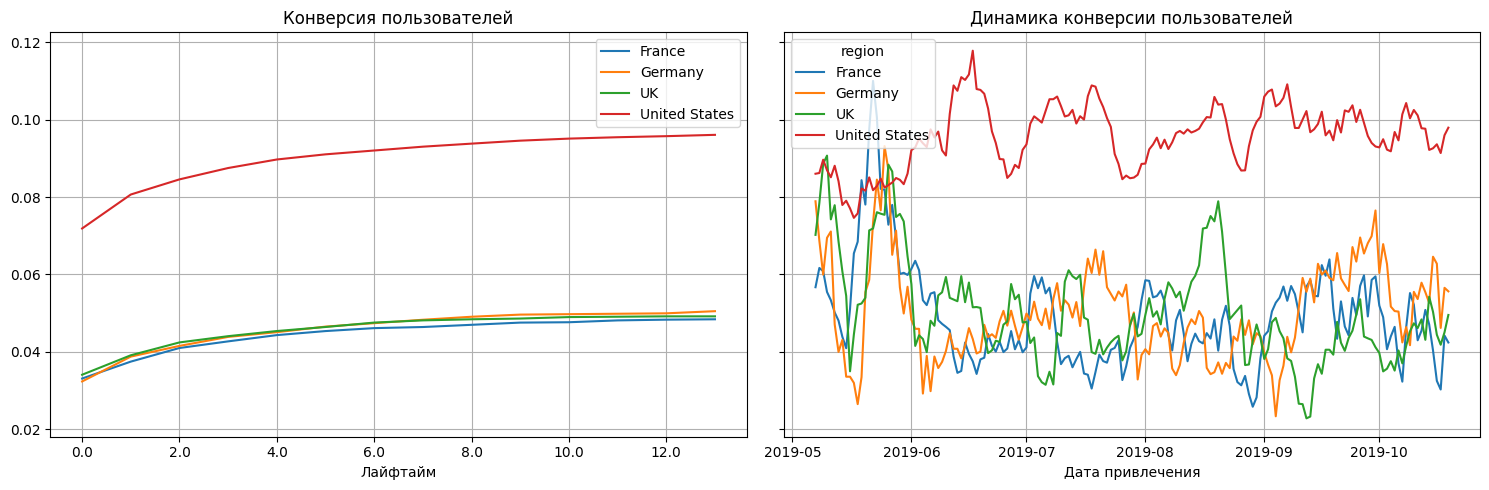

In [57]:
dimensions = ['region']
# конверсия с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

- самая высокая конверсия у США, выше в 2 раза

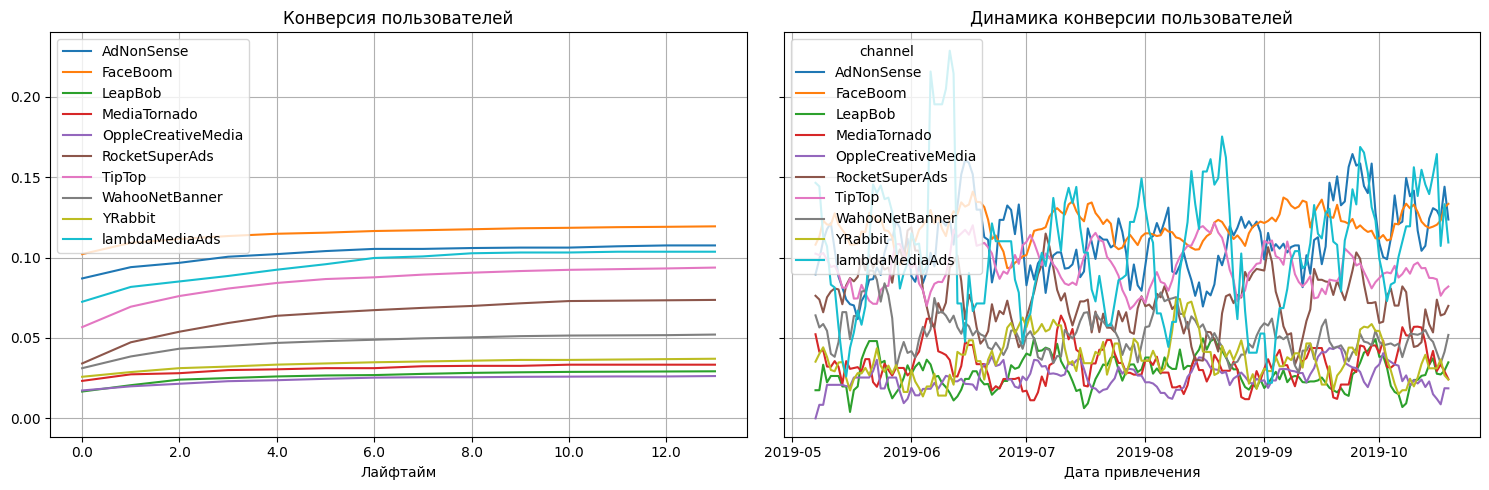

In [58]:
dimensions = ['channel']
# конверсия с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

- конверсия каналов находится примерно на одном уровне на протяжении двух недель, но у некоторых каналов динамика не стабильна в зависимости от периода: достаточно устойчива конверсия у Faceboom, AdNonSense, конверсия lambdaMediaAds характеризуется резкими взлетами и падениями до высокого (самого высокого) уровня до крайне низкого, конверсия TipTop колеблется на среднем уровне. Конверсия недорогих каналов более устойчива, но находится на более низком уровне 

**Изучим удержание пользователей**

In [59]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

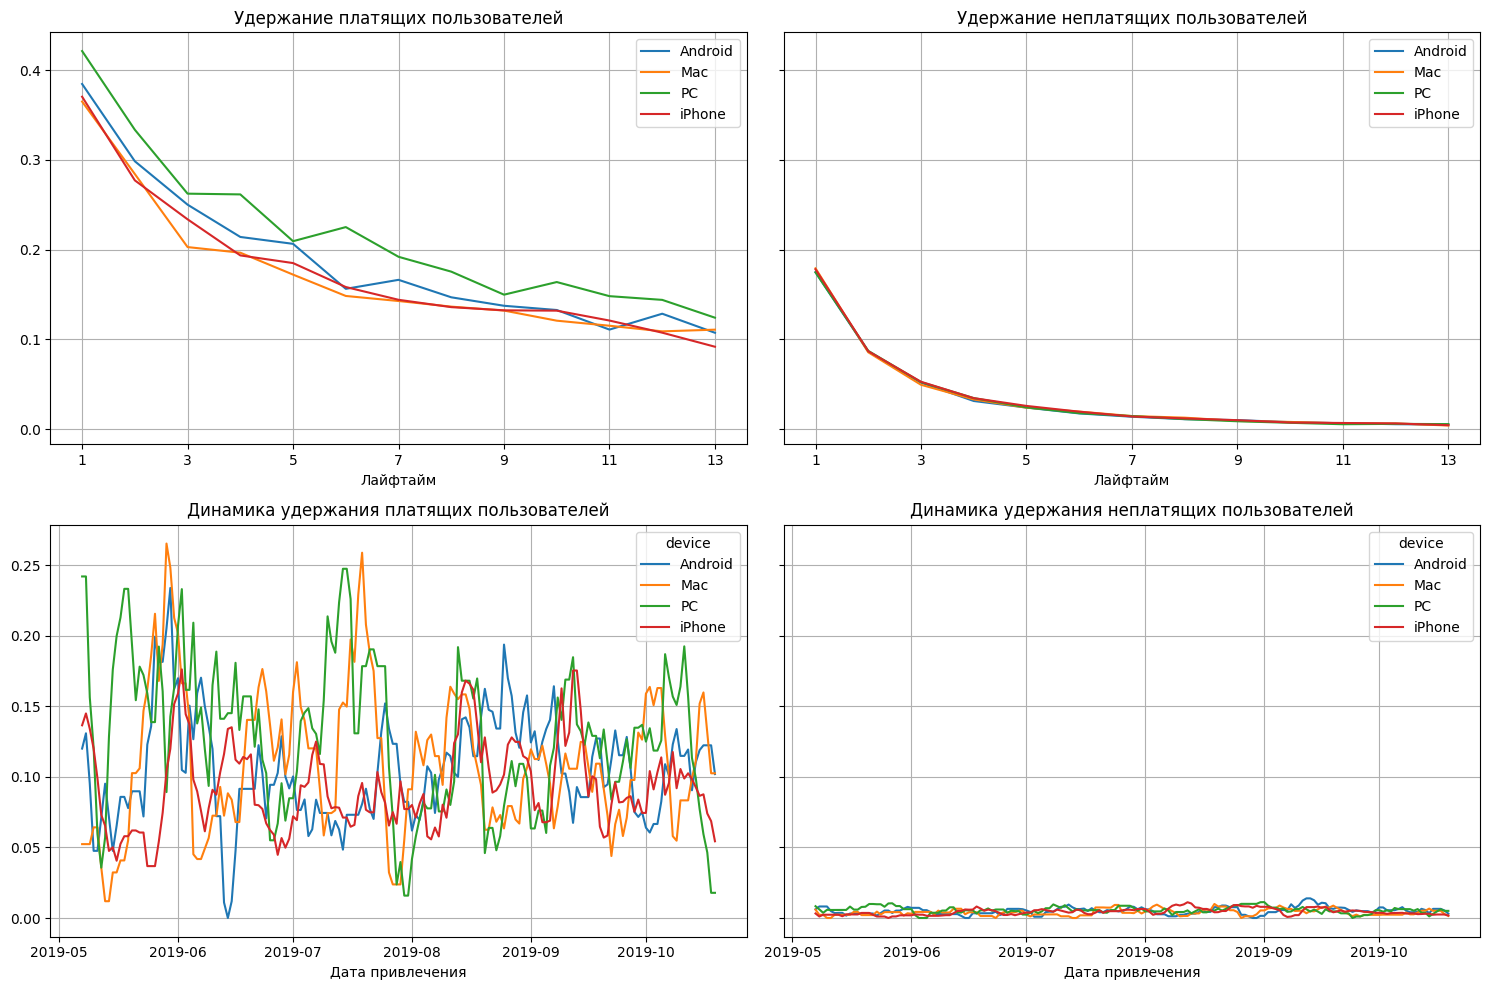

In [60]:
# удержание с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

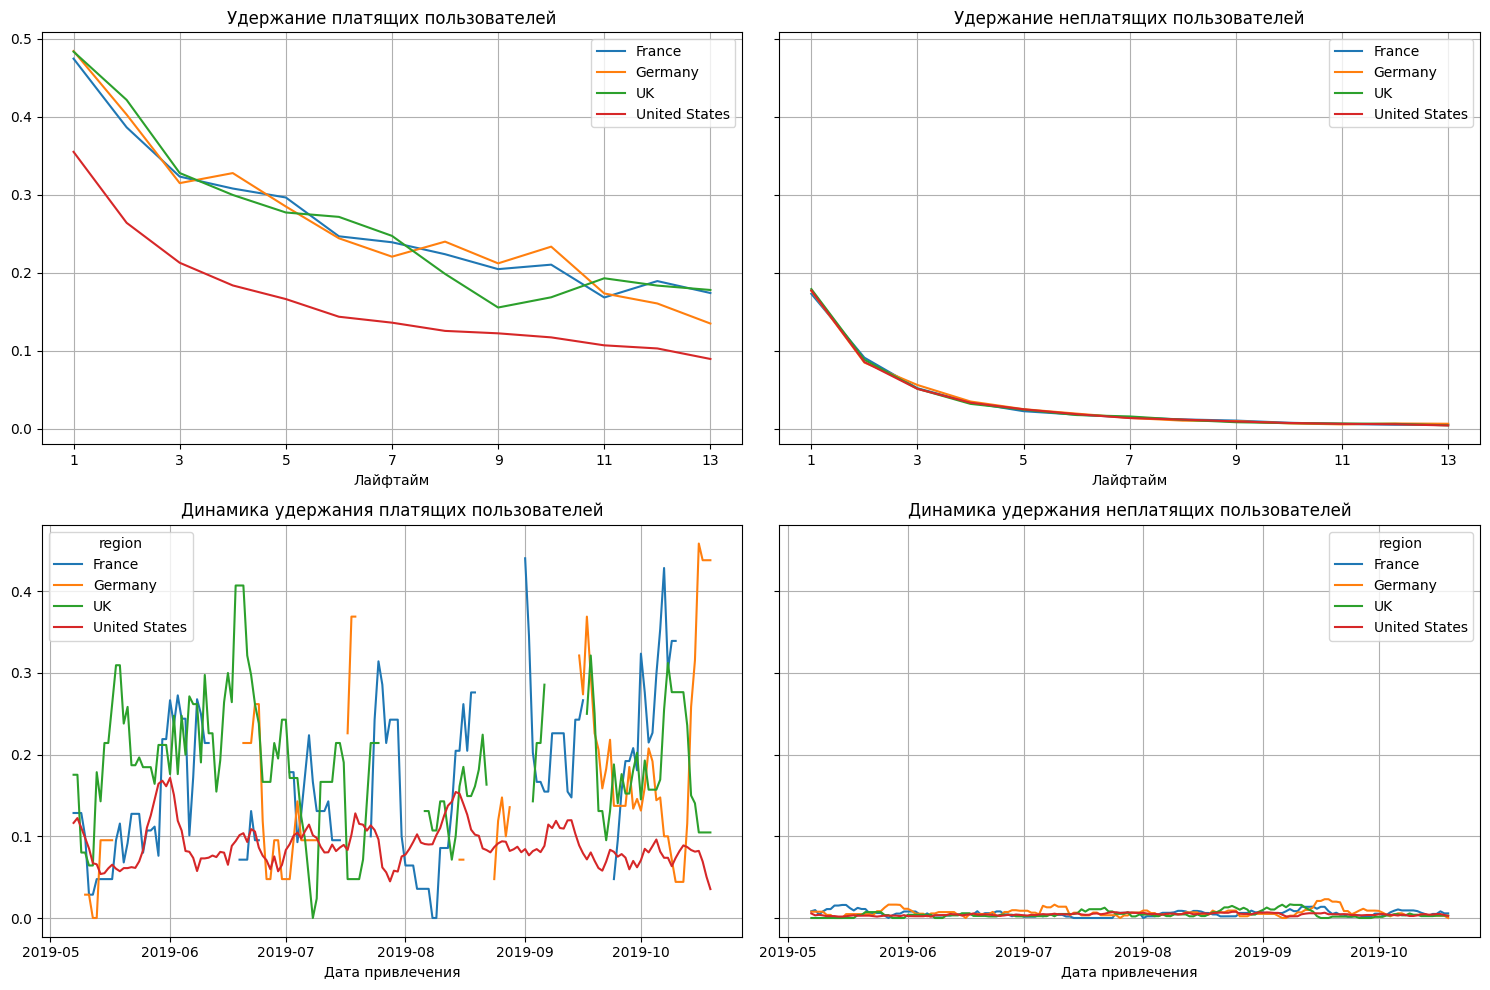

In [61]:
# удержание с разбивкой по странам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

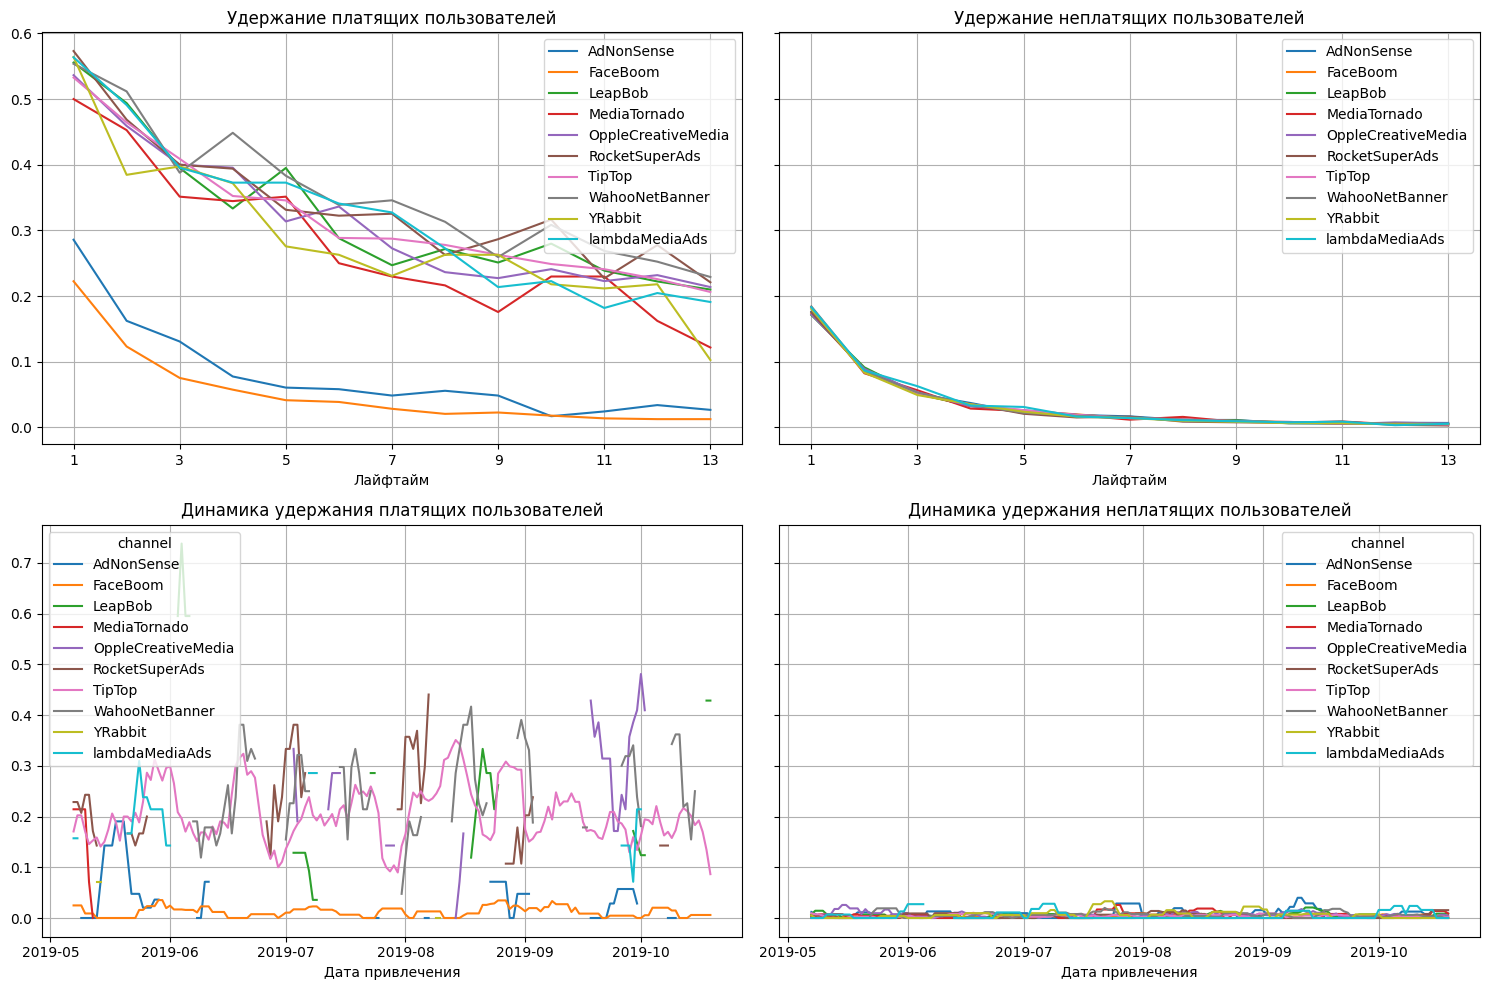

In [62]:
# удержание с разбивкой по каналам
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

- большая часть неплатящих пользователей уходит к 4 дню
- пользователи Apple удерживаются хуже всего, динамика почти совпадает, кроме летнего периода, удержание MAC и PC с июля практически все время находится на одном уровне - объединение пользователей компьютерных утсройств
- ⁠удержание по регионам: удержание в США самое низкое 
- ⁠удержание европейских стран прерывочно на протяжении всего периода, более устойчиво у Британии 
- ⁠самое низкое удержание у каналов с наибольшими расходами - FaceBoom и AdNonSense, к 13 дню оно практически на нуле 
- хорошую динамику показывают каналы RocketSuperAds, WahooNetBanner, OppleCreativeMedia - но оно прерывисто, стабильно удержание пользователей TipTop - на высоком уровне, и у пользователей Faceboom, но на крайне низком уровне
- в течение 2 недель пользователи каналов AdNonSense и FaceBoom показывают плохое удержание - к 4 дню оно уже менее 10%

#### Оценка окупаемости релкамы

Затраты на рекламу не окупаются, кампания убыточна 

Сумма расходов на рекламу составляет 105497.3.

Более 80% затрат приходится на каналы TipTop и Faceboom, им уделим особое внимание. 
На остальные каналы приходится около 1-2 % всех расходов, кроме WahooNetBanner (4.9%), AdNonSense (3.7%).

Расходы на TipTop и Faceboom изначально больше в 2 раза. Стоимость привлечения одного пользователя этих каналов также выше, однако у TipTop стоимость одного пользователя (2.8) больше, чем стоимость пользователя Faceboom (1.1) более чем в 2 раза. Стоимость пользователя Faceboom находится примерно на одном уровне с пользователем AdNonSense (1.0). 

Расходы на канал Faceboom на протяжении практически всего периода находятся на одном уровне - 6000. 
Расходы на TipTop к сентябрю (пик) увеличиваются в 4 раза. 

В уровне расходов на рекламу также выделяются WahooNetBanner и AdNonSense, однако разрыв незначительный. 

Говоря о метриках всей кампании, хорошие показатели показывает только LTV, метрика растет на протяжении всего периода, а значит пользователи приносят прибыль. 
Тем не менее, стоимость пользователей (САC) стремительно растет с мая по сентябрь, что в конечном счете приводит к тому, что ROI на протяжении всего периода находится ниже уровня окупаемости, испытывая резкое падение со середины июня. Всплески были лишь только в середине мая и июня. 

Если говорить о странах, то самой дорогой страной является США. Если стоимость привлечения пользователей Франции, Германии и Британии находится на одном уровне на протяжении всего периода наблюдения, то стоимость американских пользователей больше, чем в 2 раза. Удержание пользователей Америки также самое низкое, остальные пользователи находятся на одном уровне. В результате расходы на американскую рекламу не доходят до уровня окупаемости, в то время, как остальные каналы переходят за нее к 4-5 дню. 

Что касается LTV каналов, то наиболее ценными каналами являются lambdaMediaAds (расходы 1.5%), TipTop, RocketSuperAds (расходы 1.7%), WahooNetBanner (4.9%). 
Самая лучшая динамика у канала lambdaMediaAds, наблюдаются высокие пики в каждом месяце. Есть резкое падение в начале сентября, что скорее всего связаны с какими-то внешними причинами. 
Стабильная окупаемость также у TipTop, AdNonSense, RocketSuperAds, FaceBoom. 
Лучшая окупаемость у YRabbit в июле. 

Что касается удержания, хороший уровень показывают WahooNetBanner, RocketSuperAds, lambdaMediaAds (однако есть резкое падение к 9 дню), TipTop, ⁠самое низкое удержание у FaceBoom и AdNonSense.

Самые дорогие пользователи у iPhone и MAC, самые дешевые - у пользователей PC, причем только эти пользователи окупаются к 11 дню.

#### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?

- негативное влияние оказывают США, на эту страну приходится большая доля расходов 
- негативное влияние оказывают iPhone и MAC
- каналы FaceBoom и AdNonSense

#### Чем могут быть вызваны проблемы окупаемости?
- проблемы связаны с неэффективным распределением расходов на рекламу

### Выводы

- сместить акцент с США на европейский рынок, поскольку динамика LTV в европейских странах растет, стоимость привлечения пользователей останется неизменной, к 5 дню roi доходит до уровня окупаемости; по всем этим характеристикам США проигрывают 
- ⁠понять причину роста стоимости клиентов канала TipTop: у канала хороший LTV и динамика, неплохая конверсия и удержание, однако расходы не окупаются: нужно добиться снижения стоимости пользователей, либо уменьшить количество покупаемых пользователей, обратить внимание на американский рынок прежде всего (возможно, стоить отказаться от покупки пользователей в этой стране) 
- ⁠понять причину низкого удержания пользователей FaceBoom: на каналах приходится большая доля расходов, стабильный уровень ltv, устойчивая стоимость пользователей, хорошая конверсия, однако плохая окупаемость 
- ⁠обратить внимание на каналы lambdaMediaAds, RocketSuperAds, WahooNetBanner, YRabbit, AdNonSense (снизить расходы)
- усовершенствовать рекламную компанию для пользователей PC и Android, эти пользователи дешевле, однако пользователи Android показывают высокую динамику ltv, а также лучший уровень roi и динамику roi